In [1]:
# from sklearn.datasets import load_iris
# iris = load_iris()
# X = iris.data
# y = iris.target

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('train.csv')
data.head()

,id,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種,type
0,1,5.4,3.7,1.5,0.2,Iris-setosa,1
1,2,4.8,3.4,1.6,0.2,Iris-setosa,1
2,3,4.8,3.0,1.4,0.1,Iris-setosa,1
3,4,4.3,3.0,1.1,0.1,Iris-setosa,1
4,5,5.8,4.0,1.2,0.2,Iris-setosa,1


In [36]:
col_dict = {'花萼長度':'SepalLength(cm)','花萼寬度':'SepalWidth(cm)','花瓣長度':'PetalLength(cm)','花瓣寬度':'PetalWidth(cm)','屬種':'target'}
data = data.rename(columns=col_dict)

# Row data 

* 123 rows, 3 features, 4 labels

In [37]:
print(data.shape) # rowdata: 123 rows, 7 columns
print(data.target.unique().shape) # 4 labels
print('Num for each labels: ' + '\n',data.target.value_counts()) # num for each labels

(123, 7)
(4,)
Num for each labels: 
 Iris-virginica     40
Iris-versicolor    40
Iris-setosa        40
Iris-new_type       3
Name: target, dtype: int64


## Check NaN for each row

In [38]:
# check NaN for each column
data[data.isnull().any(axis=1)]

,id,SepalLength(cm),SepalWidth(cm),PetalLength(cm),PetalWidth(cm),target,type
120,121,NaN,3.0,4.9,1.2,Iris-new_type,4
121,122,5.2,NaN,5.1,1.8,Iris-new_type,4


## Determine whether remove NaN or not

In [39]:
data[data.target == 'Iris-new_type']

,id,SepalLength(cm),SepalWidth(cm),PetalLength(cm),PetalWidth(cm),target,type
120,121,NaN,3.0,4.9,1.2,Iris-new_type,4
121,122,5.2,NaN,5.1,1.8,Iris-new_type,4
122,123,6.1,3.2,5.1,1.8,Iris-new_type,4


## Replace NaN to mean in Iris-new_type

In [40]:
mean_value = data[data.target == 'Iris-new_type'].mean(axis=0)

data['SepalLength(cm)'].fillna(mean_value['SepalLength(cm)'],inplace = True) # replace
data['SepalWidth(cm)'].fillna(mean_value['SepalWidth(cm)'],inplace = True)

data[data.target == 'Iris-new_type'] # Get

,id,SepalLength(cm),SepalWidth(cm),PetalLength(cm),PetalWidth(cm),target,type
120,121,5.65,3.0,4.9,1.2,Iris-new_type,4
121,122,5.20,3.1,5.1,1.8,Iris-new_type,4
122,123,6.10,3.2,5.1,1.8,Iris-new_type,4


# Basic statistic plot

In [41]:
descr_data = data[list(col_dict.values())]
descr_indx = list(col_dict.values()).copy()
descr_indx.remove('target')

In [42]:
print('Target: Iris-setosa' + '\n',descr_data[descr_data.target == 'Iris-setosa'].describe().transpose())
print('Target: Iris-versicolor' + '\n',descr_data[descr_data.target == 'Iris-versicolor'].describe().transpose())
print('Target: Iris-virginica' + '\n',descr_data[descr_data.target == 'Iris-virginica'].describe().transpose())
print('Target: Iris-new_type' + '\n',descr_data[descr_data.target == 'Iris-new_type'].describe().transpose())

Target: Iris-setosa
                  count    mean       std  min    25%   50%    75%  max
PetalLength(cm)   40.0  1.4675  0.187271  1.0  1.375  1.50  1.600  1.9
SepalLength(cm)   40.0  5.0425  0.360119  4.3  4.800  5.05  5.225  5.8
SepalWidth(cm)    40.0  3.4450  0.396103  2.3  3.200  3.40  3.700  4.4
PetalWidth(cm)    40.0  0.2500  0.113228  0.1  0.200  0.20  0.300  0.6
Target: Iris-versicolor
                  count    mean       std  min  25%   50%    75%  max
PetalLength(cm)   40.0  4.2325  0.467611  3.0  4.0  4.25  4.500  5.1
SepalLength(cm)   40.0  5.8950  0.451749  5.0  5.6  5.85  6.125  6.8
SepalWidth(cm)    40.0  2.7450  0.306301  2.0  2.5  2.80  3.000  3.4
PetalWidth(cm)    40.0  1.3125  0.204046  1.0  1.2  1.30  1.500  1.8
Target: Iris-virginica
                  count    mean       std  min  25%   50%  75%  max
PetalLength(cm)   40.0  5.4975  0.533247  4.8  5.1  5.45  5.7  6.9
SepalLength(cm)   40.0  6.5925  0.598883  5.6  6.2  6.45  6.9  7.9
SepalWidth(cm)    40.0  2.982

## Variable boxplot (for each target)

* PetalLength: 觀察下圖三個物種(除了`new_type`)的花瓣長度明顯不同，且上表7種統計指標中(除了count)都能夠明顯區分出三個物種，尤其以`setosa`而言，上表的統計指標都比其餘兩個物種低很多。

---

* PetalWidth: 觀察下圖，`setosa`的花瓣寬度明顯較其他物種較低。

---

* SepalWidth: `setosa`物種的花萼寬度稍高一些，且中位數比其他三個物種的Q3都還要高，若要以此特徵判斷物種，在判斷`setosa`上是一個不錯的指標，而新物種`new_type`因為數量只有3個，而且還使用平均值來替代NaN，若要與其餘三物種比較，可能略為勉強，而以數據的對稱性而言，`virginica`比其餘兩個物種都來的對稱一些(除了`new_type`)。

---

* SepalLength: 除了`new_type`以外的三個物種的花萼長度也有差異，從下圖觀察並從上表發現在花萼長度的所有統計指標(除了count)依降冪依序為`virginica` $\rightarrow$ `versicolor` $\rightarrow$ `setosa`，也是個不錯的feature。

---

除此之外，觀察盒鬚圖也能大概得知數據分佈是屬於右偏、左偏還是對稱分配。以下圖來說，`SepalLength`的物種`virginica`有稍微右偏，其餘三個物種則趨向於對稱分配，用肉點判斷其實是不太準確的方法，最好的方法是計算偏態係數(skew)或是比較平均值與中位數。


/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:2586: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


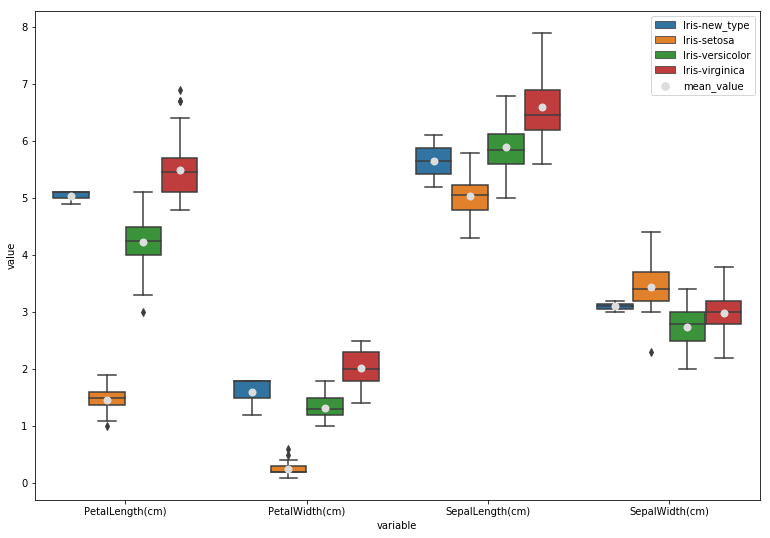

In [43]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13,9
import seaborn
plotdd = pd.melt(descr_data,id_vars='target')
plotdd = plotdd.sort_values(['target','variable'])

meantb = plotdd.groupby(['target','variable']).mean().reset_index()
meantb = meantb.sort_values(['target','variable'])

pp = seaborn.boxplot(data=plotdd, hue='target',x='variable',y='value')
pp = seaborn.stripplot(data=meantb, hue='target',x='variable',y='value',split = True,size=8,
                       palette=['#DDDDDD','#DDDDDD','#DDDDDD','#DDDDDD'])
handles, labels = pp.get_legend_handles_labels()
newlabels = labels[0:4].copy()
newlabels.append('mean_value')
plt.legend(handles[0:5],newlabels[0:5])

plt.show()

`virginica`物種的`SepalLength`偏態係數為$0.6 > 0$，為右偏，表示`virginica`這個物種的花萼長度大部分的資料都比較小，只有少數幾筆比較大，所以其平均數 $>$ 中位數。

In [44]:
plotdd.groupby(['variable','target']).skew()

value
variable        target                   
PetalLength(cm) Iris-new_type   -1.732051
                Iris-setosa     -0.017553
                Iris-versicolor -0.487246
                Iris-virginica   0.983317
PetalWidth(cm)  Iris-new_type   -1.732051
                Iris-setosa      1.115591
                Iris-versicolor  0.165308
                Iris-virginica  -0.318824
SepalLength(cm) Iris-new_type    0.000000
                Iris-setosa      0.009863
                Iris-versicolor  0.160843
                Iris-virginica   0.606137
SepalWidth(cm)  Iris-new_type    0.000000
                Iris-setosa     -0.021589
                Iris-versicolor -0.416645
                Iris-virginica   0.344409

# Compare PetalLength and PetalWidth between target
`versicolor`物種的花瓣長度與寬度呈現高度正相關，`setosa`以及`virginica`則呈現低度正相關。

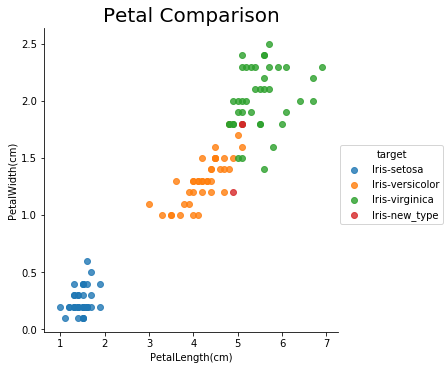

In [45]:
seaborn.lmplot(data=descr_data, x='PetalLength(cm)',y='PetalWidth(cm)',hue='target',fit_reg=False)
ax = plt.gca()
ax.set_title('Petal Comparison',size=20)
plt.show()

In [46]:
descr_data.loc[:,['target','PetalLength(cm)','PetalWidth(cm)']].groupby(['target']).corr()

PetalLength(cm)  PetalWidth(cm)
target                                                          
Iris-new_type   PetalLength(cm)         1.000000        1.000000
                PetalWidth(cm)          1.000000        1.000000
Iris-setosa     PetalLength(cm)         1.000000        0.284171
                PetalWidth(cm)          0.284171        1.000000
Iris-versicolor PetalLength(cm)         1.000000        0.785712
                PetalWidth(cm)          0.785712        1.000000
Iris-virginica  PetalLength(cm)         1.000000        0.281096
                PetalWidth(cm)          0.281096        1.000000

# Compare SepalLength and SepalWidth between target
`setosa`物種的花萼長度與寬度呈現高度正相關，`versicolor`以及`virginica`則呈現中度正相關。

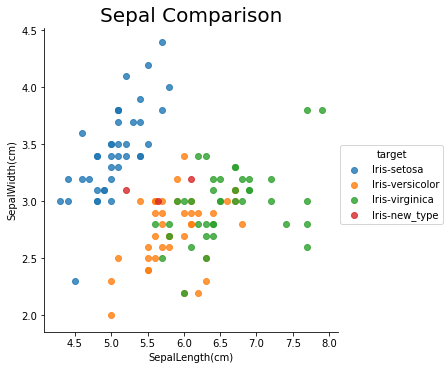

In [47]:
seaborn.lmplot(data=descr_data, x='SepalLength(cm)',y='SepalWidth(cm)',hue='target',fit_reg=False)
ax = plt.gca()
ax.set_title('Sepal Comparison',size=20)
plt.show()

In [48]:
descr_data.loc[:,['target','SepalLength(cm)','SepalWidth(cm)']].groupby(['target']).corr()

SepalLength(cm)  SepalWidth(cm)
target                                                          
Iris-new_type   SepalLength(cm)         1.000000        0.500000
                SepalWidth(cm)          0.500000        1.000000
Iris-setosa     SepalLength(cm)         1.000000        0.734030
                SepalWidth(cm)          0.734030        1.000000
Iris-versicolor SepalLength(cm)         1.000000        0.413047
                SepalWidth(cm)          0.413047        1.000000
Iris-virginica  SepalLength(cm)         1.000000        0.442636
                SepalWidth(cm)          0.442636        1.000000

# Simple train

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from time import time

## Generate training, validation data

In [80]:
descr_data = descr_data[descr_data['target'] != 'Iris-new_type']
labelencdoer = LabelEncoder()
y = labelencdoer.fit_transform(descr_data['target'])
X = descr_data.loc[:,['SepalLength(cm)','SepalWidth(cm)','PetalLength(cm)','PetalWidth(cm)']].values

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 11, shuffle = True)

In [81]:
print(X_train.shape)
print(Counter(y_train))
print(X_val.shape)
print(Counter(y_val))

(90, 4)
Counter({2: 32, 1: 31, 0: 27})
(30, 4)
Counter({0: 13, 1: 9, 2: 8})


In [82]:
def svm_tune(X_train, y_train, X_val, y_val, kernel, params, C=1):
    for param in params:
        start = time()
        kernel_dict = {'linear':SVC(kernel='linear',C=param),
                       'poly':SVC(kernel='poly',C=1,degree=param),
                       'rbf':SVC(kernel='rbf',C=1,gamma=param)}
        
        if kernel in kernel_dict:
            model = kernel_dict[kernel]
            model.fit(X_train, y_train)
            
            train_true, train_pred = y_train, model.predict(X_train)
            val_true, val_pred = y_val, model.predict(X_val)
            
        if kernel == 'linear':
            print('Linear svm for C:%.2f'%param,'\n','Testing data' + '\n', 
                  classification_report(y_true=val_true, y_pred=val_pred),'\n',
                  confusion_matrix(y_true=val_true, y_pred=val_pred))
        elif kernel == 'poly':
            print('Polynomial svm for degree:%.2f'%param,'\n','Testing data' + '\n', 
                  classification_report(y_true=val_true, y_pred=val_pred),'\n',
                  confusion_matrix(y_true=val_true, y_pred=val_pred))
        elif kernel == 'rbf':
            print('RBF svm for gamma:%.2f'%param,'\n','Testing data' + '\n', 
                  classification_report(y_true=val_true, y_pred=val_pred),'\n',
                  confusion_matrix(y_true=val_true, y_pred=val_pred))
        elasped = (time() - start)
        print('Time used:%.3f' % elasped + 's')

## Linear svm performance on testing data in various C

In [83]:
params = [0.01,0.1,1,10]
linear = svm_tune(X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, kernel='linear', params = params)

Linear svm for C:0.01 
 Testing data
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      0.89      0.94         9
          2       0.89      1.00      0.94         8

avg / total       0.97      0.97      0.97        30
 
 [[13  0  0]
 [ 0  8  1]
 [ 0  0  8]]
Time used:0.004s
Linear svm for C:0.10 
 Testing data
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      1.00      1.00         9
          2       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00        30
 
 [[13  0  0]
 [ 0  9  0]
 [ 0  0  8]]
Time used:0.004s
Linear svm for C:1.00 
 Testing data
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      1.00      1.00         9
          2       1.00      1.00      1.00         8

avg / total       1.00  

## Polynomial svm performance on testing data in various degree

In [84]:
params = [1,2,3,4]
poly = svm_tune(X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, kernel='poly', params = params)

Polynomial svm for degree:1.00 
 Testing data
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      1.00      1.00         9
          2       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00        30
 
 [[13  0  0]
 [ 0  9  0]
 [ 0  0  8]]
Time used:0.004s
Polynomial svm for degree:2.00 
 Testing data
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      1.00      1.00         9
          2       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00        30
 
 [[13  0  0]
 [ 0  9  0]
 [ 0  0  8]]
Time used:0.004s
Polynomial svm for degree:3.00 
 Testing data
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      1.00      1.00         9
          2       1.00      1.00      1.00         

## RBF svm performance on testing data in various gamma

In [85]:
params = [0.01,0.1,1,10,100]
poly = svm_tune(X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, kernel='rbf', params = params)

RBF svm for gamma:0.01 
 Testing data
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      1.00      1.00         9
          2       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00        30
 
 [[13  0  0]
 [ 0  9  0]
 [ 0  0  8]]
Time used:0.005s
RBF svm for gamma:0.10 
 Testing data
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      1.00      1.00         9
          2       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00        30
 
 [[13  0  0]
 [ 0  9  0]
 [ 0  0  8]]
Time used:0.004s
RBF svm for gamma:1.00 
 Testing data
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      1.00      1.00         9
          2       1.00      1.00      1.00         8

avg / total       1.0

## Summary

在驗證集的表現上，三種kernel在特定的參數上都有不錯的表現。

* 論效率及表現而言，`linear`是第一選擇，隨著懲罰參數`C`的增加，在validation set上的表現也有一定的水準，而且從confusion matrix看來，最容易被誤分的物種是`versicolor`以及`virginica`，從上面的盒鬚圖中，兩個物種花萼寬度`SepalWidth`在分佈上長得差不多，數值範圍也重疊不少，且從上面的散佈圖看來，兩個物種的花萼寬度也是不太容易區分的。

# Predict on testing set

In [88]:
test = pd.read_csv('test.csv')
test = test.iloc[:,[1,2,3,4]].rename(columns=col_dict)
test = test.values

In [90]:
model = SVC(kernel='linear',C=1)
model.fit(X,y)
prediction = model.predict(test)

In [91]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2])